In [2]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime

In [39]:
# Récupération du fichier des ventes
df_sales = pd.read_csv("data/05-10-2021/OData ISA set 5 Sales 05-10-2021.csv", encoding="latin", delimiter=";", decimal=",")

In [40]:
# Suppression des colonnes inutiles
df_sales.drop(["SIM_DATE", "SALES_ORDER_NUMBER", "LINE_ITEM", "REGION", "CITY", "COUNTRY", "POSTAL_CODE",
               "DISTRIBUTION_CHANNEL", "MATERIAL_NUMBER", "MATERIAL_DESCRIPTION", "MATERIAL_TYPE", "MATERIAL_SIZE",
               "QUANTITY_DELIVERED", "UNIT", "CURRENCY"], axis=1, inplace=True)

In [41]:
# Conversion des types
columns_type = {'ID': 'string', 'SALES_ORGANIZATION': 'string', 'STORAGE_LOCATION': 'string', 'AREA': 'string',
                'MATERIAL_CODE': 'string', 'MATERIAL_LABEL' : 'string', 'NET_PRICE': 'float64', 'NET_VALUE': 'float64',
                'COST': 'float64', 'CONTRIBUTION_MARGIN': 'float64', 'CONTRIBUTION_MARGIN_PCT': 'float64', 'AREA': 'category'}

df_sales = df_sales.astype(columns_type)

In [42]:
# Conversion de la colonne SIM_CALENDAR_DATE au format datetime
df_sales["SIM_CALENDAR_DATE"] = pd.to_datetime(df_sales["SIM_CALENDAR_DATE"])

In [43]:
# Visualisation des types des données
df_sales.dtypes

ID                                 string
ROW_NUMBER                          int64
SALES_ORGANIZATION                 string
SIM_ROUND                           int64
SIM_STEP                            int64
SIM_CALENDAR_DATE          datetime64[ns]
SIM_PERIOD                          int64
SIM_ELAPSED_STEPS                   int64
STORAGE_LOCATION                   string
AREA                             category
CUSTOMER_NUMBER                     int64
MATERIAL_CODE                      string
MATERIAL_LABEL                     string
QUANTITY                            int64
NET_PRICE                         float64
NET_VALUE                         float64
COST                              float64
CONTRIBUTION_MARGIN               float64
CONTRIBUTION_MARGIN_PCT           float64
dtype: object

In [44]:
# Tri du tableau par ROW_NUMBER
df_sales.sort_values(by=["ROW_NUMBER"], axis=0, inplace=True, ignore_index=True)
df_sales.head()

,ID,ROW_NUMBER,SALES_ORGANIZATION,SIM_ROUND,SIM_STEP,SIM_CALENDAR_DATE,SIM_PERIOD,SIM_ELAPSED_STEPS,STORAGE_LOCATION,AREA,CUSTOMER_NUMBER,MATERIAL_CODE,MATERIAL_LABEL,QUANTITY,NET_PRICE,NET_VALUE,COST,CONTRIBUTION_MARGIN,CONTRIBUTION_MARGIN_PCT
0,.1~1,1,A5,1,4,2021-04-01,1,4,03N,North,80297,T01,Milk,47,32.0,1504.0,1083.82,420.18,0.28
1,.1~2,2,A5,1,4,2021-04-01,1,4,03N,North,80297,T05,Butter,23,70.0,1610.0,1383.91,226.09,0.14
2,.1~3,3,A5,1,4,2021-04-01,1,4,03N,North,80297,T06,Ice Cream,40,48.0,1920.0,1734.40,185.60,0.10
3,.1~4,4,A5,1,4,2021-04-01,1,4,03N,North,80297,T06,Ice Cream,34,48.0,1632.0,1474.24,157.76,0.10
4,.1~5,5,A5,1,4,2021-04-01,1,4,03S,South,80298,T02,Cream,27,79.0,2133.0,1955.34,177.66,0.08


In [45]:
# Affichage des entreprises du dataset
entreprises = sorted(df_sales["SALES_ORGANIZATION"].unique())
print("Entreprises :", entreprises)

Entreprises : ['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5']


In [47]:
# Calcul des quantités vendus, du prix net, de la valeur net et du coût de l'entreprise A pour chaque jour
df_sales_A5_gb = df_sales_A5[["SIM_CALENDAR_DATE", "QUANTITY", "NET_PRICE", "NET_VALUE", "COST", "CONTRIBUTION_MARGIN"]].groupby(["SIM_CALENDAR_DATE"]).sum()
df_sales_A5_gb.head()

,QUANTITY,NET_PRICE,NET_VALUE,COST,CONTRIBUTION_MARGIN
SIM_CALENDAR_DATE,,,,,
2021-01-02,55,149.0,4075.0,3623.60,451.40
2021-01-03,132,246.0,6964.0,6201.52,762.48
2021-01-13,87,190.0,4758.0,4079.34,678.66
2021-01-14,112,413.0,9082.0,8355.66,726.34
2021-01-15,177,412.0,11577.0,10509.12,1067.88


<AxesSubplot:title={'center':"Évolution de la valeur net et du coût pour l'entreprise A"}, xlabel='Date', ylabel='prix (€)'>

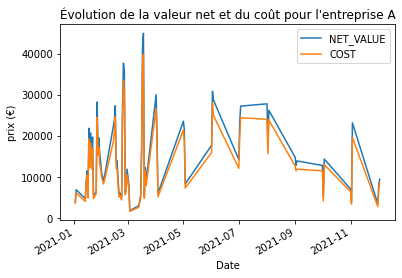

In [48]:
# Affichage de l'évolution du net value et du cost au cours du temps pour l'entreprise A
df_sales_A5_gb.plot(y=["NET_VALUE", "COST"], title="Évolution de la valeur net et du coût pour l'entreprise A", xlabel="Date", ylabel="prix (€)")

<AxesSubplot:title={'center':"Évolution des quantités de ventes de l'entreprise A"}, xlabel='Date'>

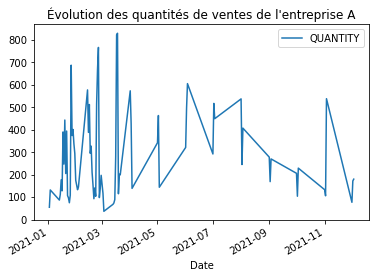

In [49]:
# Affichage de l'évolution des quantités vendues au cours du temps pour l'entreprise A
df_sales_A5_gb.plot(y=["QUANTITY"], title="Évolution des quantités de ventes de l'entreprise A", xlabel="Date")

<AxesSubplot:title={'center':"Évolution des quantités de ventes et de la marge de l'entreprise A"}, xlabel='Date', ylabel='prix (€)'>

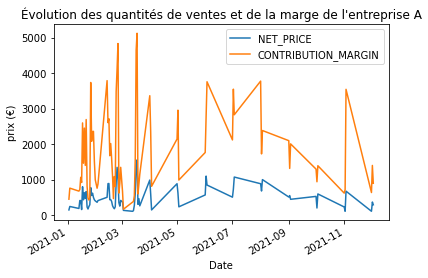

In [50]:
# Affichage de l'évolution du prix net et de la marge au cours du temps pour l'entreprise A
df_sales_A5_gb.plot(y=["NET_PRICE", "CONTRIBUTION_MARGIN"], title="Évolution des quantités de ventes et de la marge de l'entreprise A", xlabel="Date", ylabel="prix (€)")

In [51]:
# Calcul des quantités vendues par zone géographique du 2 janvier au 6 janvier (5 jours) pour l'entreprise A
df_sales_A5_5d = df_sales_A5[df_sales_A5["SIM_CALENDAR_DATE"] <= "2021-01-06"]
df_sales_A5_5d = df_sales_A5_5d[["AREA", "QUANTITY"]].groupby(["AREA"]).sum()
df_sales_A5_5d

,QUANTITY
AREA,
North,130
South,55
West,2


<AxesSubplot:title={'center':"Répartition des ventes de l'entreprise A du 2 au 6 janvier (5 jours)"}, xlabel='AREA', ylabel='Nombre de ventes'>

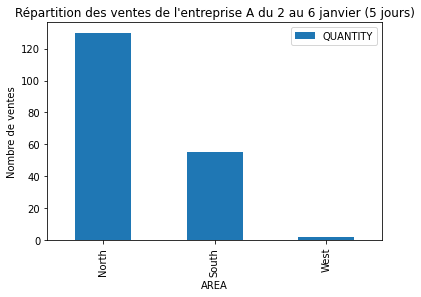

In [52]:
# Affichage des quantités vendues par zone sur ces 5 jours pour l'entreprise A avec un graphique à barres
df_sales_A5_5d.plot(kind="bar", title="Répartition des ventes de l'entreprise A du 2 au 6 janvier (5 jours)", ylabel="Nombre de ventes")

<AxesSubplot:title={'center':"Répartition de l'ensemble des ventes de l'entreprise A"}, xlabel='AREA', ylabel='Nombre de ventes'>

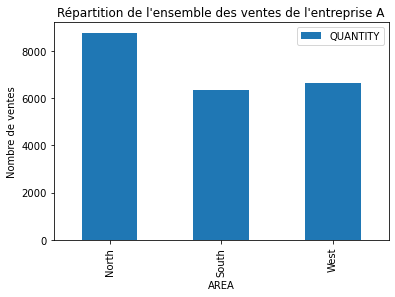

In [53]:
# Affichage de l'ensemble des ventes par zones pour l'entreprise A
df_sales_A5[["AREA", "QUANTITY"]].groupby(["AREA"]).sum().plot(kind="bar", title="Répartition de l'ensemble des ventes de l'entreprise A", ylabel="Nombre de ventes")

## Nouveau jeu de données 11-01-2022

### Affichage des évolutions des ventes et de leur répartition dans les entrepots

In [3]:
# Récupération du fichier des ventes
df_sales = pd.read_csv("data/11-01-2022/Sales.csv", encoding="latin", delimiter=";", decimal=",")

# Suppression des colonnes inutiles
df_sales.drop(["SIM_DATE", "SALES_ORDER_NUMBER", "LINE_ITEM", "REGION", "CITY", "COUNTRY", "POSTAL_CODE",
               "DISTRIBUTION_CHANNEL", "MATERIAL_NUMBER", "MATERIAL_DESCRIPTION", "MATERIAL_TYPE", "MATERIAL_SIZE",
               "QUANTITY_DELIVERED", "UNIT", "CURRENCY"], axis=1, inplace=True)

# Conversion des types
columns_type = {'ID': 'string', 'SALES_ORGANIZATION': 'string', 'STORAGE_LOCATION': 'string', 'AREA': 'string',
                'MATERIAL_CODE': 'string', 'MATERIAL_LABEL' : 'string', 'NET_PRICE': 'float64', 'NET_VALUE': 'float64',
                'COST': 'float64', 'CONTRIBUTION_MARGIN': 'float64', 'CONTRIBUTION_MARGIN_PCT': 'float64', 'AREA': 'category'}

df_sales = df_sales.astype(columns_type)

# Conversion de la colonne SIM_CALENDAR_DATE au format datetime
df_sales["SIM_CALENDAR_DATE"] = pd.to_datetime(df_sales["SIM_CALENDAR_DATE"], format="%d/%m/%Y %H:%M")

# Visualisation des types des données
# print(df_sales.dtypes)

# Tri du tableau par ROW_NUMBER
df_sales.sort_values(by=["ROW_NUMBER"], axis=0, inplace=True, ignore_index=True)

In [4]:
df_sales.head(10)

,ID,ROW_NUMBER,SALES_ORGANIZATION,SIM_ROUND,SIM_STEP,SIM_CALENDAR_DATE,SIM_PERIOD,SIM_ELAPSED_STEPS,STORAGE_LOCATION,AREA,CUSTOMER_NUMBER,MATERIAL_CODE,MATERIAL_LABEL,QUANTITY,NET_PRICE,NET_VALUE,COST,CONTRIBUTION_MARGIN,CONTRIBUTION_MARGIN_PCT
0,.1~1,1,A9,1,2,2021-01-02,1,2,03N,North,80297,T01,Milk,84,27.78,2333.52,1942.92,390.60,0.17
1,.1~2,2,A9,1,2,2021-01-02,1,2,03N,North,80297,T01,Milk,61,27.78,1694.58,1410.93,283.65,0.17
2,.1~3,3,A9,1,2,2021-01-02,1,2,03N,North,80297,T03,Yoghurt,63,31.27,1970.01,1641.15,328.86,0.17
3,.1~4,4,A9,1,2,2021-01-02,1,2,03N,North,80294,T06,Ice Cream,41,52.22,2141.02,1783.09,357.93,0.17
4,.1~5,5,A9,1,2,2021-01-02,1,2,03S,South,80300,T06,Ice Cream,9,52.22,469.98,391.41,78.57,0.17
5,.1~6,6,A9,1,2,2021-01-02,1,2,03W,West,80303,T05,Butter,24,72.46,1739.04,1448.40,290.64,0.17
6,.1~7,7,A9,1,3,2021-01-03,1,3,03N,North,80294,T03,Yoghurt,57,31.27,1782.39,1484.85,297.54,0.17
7,.1~8,8,A9,1,3,2021-01-03,1,3,03N,North,80294,T05,Butter,32,72.46,2318.72,1931.20,387.52,0.17
8,.1~9,9,A9,1,3,2021-01-03,1,3,03N,North,80297,T06,Ice Cream,9,52.22,469.98,391.41,78.57,0.17
9,.1~10,10,A9,1,3,2021-01-03,1,3,03S,South,80299,T01,Milk,58,27.78,1611.24,1341.54,269.70,0.17


In [5]:
def drawSalesDistribution(dataframe, company, products, startDate=None, endDate=None):
    """
    Description :
    :param dataframe:
    :param company:
    :param startDate:
    :param endDate:
    :return:
    """
    dataframe_company = dataframe[dataframe["SALES_ORGANIZATION"] == company]
    dataframe_company = dataframe_company.reset_index(drop=True)
    storages = ["03N", "03S", "03W"]
    storages_names = ["nord", "sud", "ouest"]
    
    if startDate:
        dataframe_company = dataframe_company[dataframe_company["SIM_CALENDAR_DATE"] >= startDate]
        dataframe_company = dataframe_company.reset_index(drop=True)
    else:
        startDate = dataframe_company.loc[0, "SIM_CALENDAR_DATE"]
        
    if endDate:
        dataframe_company = dataframe_company[dataframe_company["SIM_CALENDAR_DATE"] <= endDate]
        dataframe_company = dataframe_company.reset_index(drop=True)
    else:
        endDate = dataframe_company.loc[len(dataframe_company)-1, "SIM_CALENDAR_DATE"]
        
    if isinstance(products, str): products = [products]
    
    plt.style.use('ggplot')
    plt.figure(figsize=(10,14))
    plt.suptitle("Répartition des ventes dans les régions", size=20)
    
    dataframe_company_allstorages = dataframe_company[["SIM_CALENDAR_DATE", "STORAGE_LOCATION", "MATERIAL_LABEL", "QUANTITY"]]
    dataframe_company_allstorages = dataframe_company_allstorages[dataframe_company_allstorages["MATERIAL_LABEL"].isin(products)]
    dataframe_company_allstorages = dataframe_company_allstorages.groupby(["STORAGE_LOCATION", "MATERIAL_LABEL"]).sum()
    dataframe_company_allstorages = addNoSalesData(dataframe_company_allstorages, products, storage=True)
    
    for storage, storage_name, i in zip(storages, storages_names, range(1,len(storages)+1)):
        dataframe_company_storage = dataframe_company_allstorages.loc[(storage), :]
        
        plt.subplot(3,1,i)
        plt.title(f"Entrepôt {storage_name}")
        plt.bar(dataframe_company_storage.index.values, dataframe_company_storage.loc[:, "QUANTITY"])
        plt.xlabel("Produits")
        plt.ylabel("Quantité vendue")
    
    plt.subplots_adjust(hspace=0.3)
    
    return dataframe_company_allstorages

In [6]:
def drawSalesEvolution(dataframe, company, products, startDate=None, endDate=None):
    """
    Display one graph of the evolution of the sales
    :param dataframe: Sales dataframe
    :param company: Company name
    :param products: string or list of products to display
    :param startDate: First day to display
    :param endDate: Last day to display
    :return: New dataframe of sales group by day and products and display the plot
    """
    dataframe_company = dataframe[dataframe["SALES_ORGANIZATION"] == company]
    dataframe_company = dataframe_company.reset_index(drop=True)
    
    if startDate:
        dataframe_company = dataframe_company[dataframe_company["SIM_CALENDAR_DATE"] >= startDate]
        dataframe_company = dataframe_company.reset_index(drop=True)
    else:
        startDate = dataframe_company.loc[0, "SIM_CALENDAR_DATE"]
        
    if endDate:
        dataframe_company = dataframe_company[dataframe_company["SIM_CALENDAR_DATE"] <= endDate]
        dataframe_company = dataframe_company.reset_index(drop=True)
    else:
        endDate = dataframe_company.loc[len(dataframe_company)-1, "SIM_CALENDAR_DATE"]
        
    dateRange = pd.date_range(start=startDate, end=endDate)
    dateRange.freq = None
    xlabel = dateRange.tolist()
    xlabel = [timestamp.date() for timestamp in xlabel]
    
    if isinstance(products, str): products = [products]
    
    plt.style.use('ggplot')
    plt.figure(figsize=(10,6))
    plt.title("Évolution des ventes")
    plt.xlabel("Date")
    plt.ylabel("Nombre de ventes")
    plt.xticks(dateRange, xlabel, rotation=45)
  
    dataframe_company_products = dataframe_company[dataframe_company["MATERIAL_LABEL"].isin(products)]
    dataframe_company_products = dataframe_company_products[["SIM_CALENDAR_DATE", "MATERIAL_LABEL", "QUANTITY"]].groupby(["SIM_CALENDAR_DATE", "MATERIAL_LABEL"]).sum()
    dataframe_company_products = addNoSalesData(dataframe_company_products, products, dateRange)
    
    for product in products:
        dataframe_product = dataframe_company_products.xs(key=product, level=1)
        plt.plot(dateRange, dataframe_product["QUANTITY"], label=product)
        
    plt.legend(bbox_to_anchor=(1.0, 1.0))
                                       
    return dataframe_company_products

In [7]:
def addNoSalesData(dataframe, products, dateRange=None, storage=False):
    """
    Add data in the dataframe on day where there is no sales. Use to plot curve of sales
    :param dataframe: Sales dataframe
    :param dateRange: dateRange object 
    :param products: string or list of products to display
    :param storage: boolean if the function is called to display storage distribution
    :return: New dataframe with no sales line added, group by day and product
    """
    if isinstance(products, str): products = [products]  
    
    if storage:
        storages = storages = ["03N", "03S", "03W"]
        for storage in storages:
            for product in products:
                if not dataframe.index.isin([(storage, product)]).any():
                    dataframe.loc[(storage, product), "QUANTITY"] = 0
        dataframe = dataframe.groupby(["STORAGE_LOCATION", "MATERIAL_LABEL"]).sum()
        dataframe = dataframe.sort_index(level="MATERIAL_LABEL")
        
    else:
        for date in dateRange:
            for product in products:
                 if not dataframe.index.isin([(date, product)]).any():
                    dataframe.loc[(date, product), "QUANTITY"] = 0     
        dataframe = dataframe.groupby(["SIM_CALENDAR_DATE", "MATERIAL_LABEL"]).sum()
        dataframe = dataframe.sort_index(level="SIM_CALENDAR_DATE")
        
    dataframe = dataframe.astype({'QUANTITY': 'int64'})
    
    return dataframe

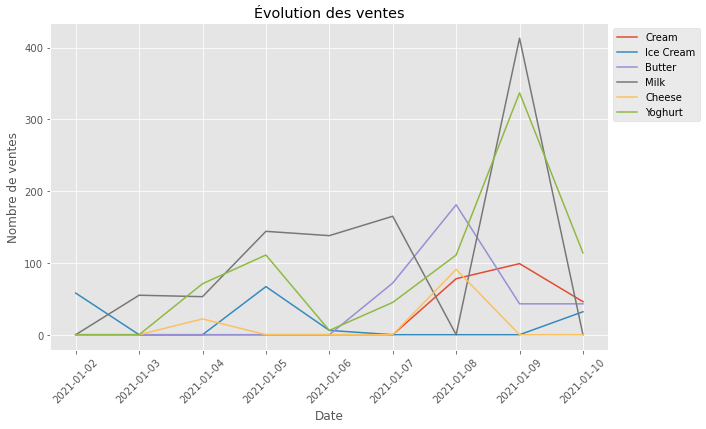

In [8]:
df_group = drawSalesEvolution(df_sales, "C9", ["Cream", "Ice Cream", "Butter", "Milk", "Cheese", "Yoghurt"])

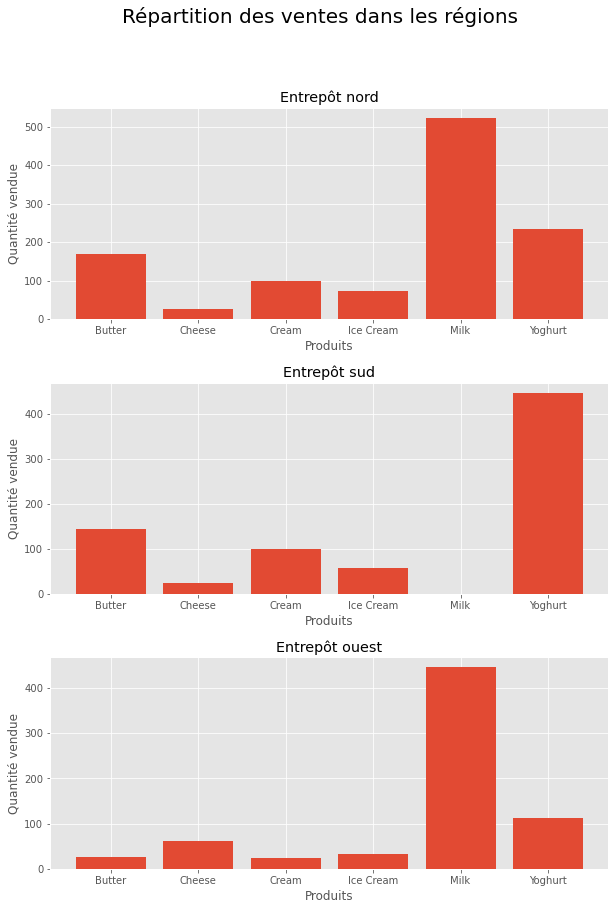

In [9]:
df_allstorages = drawSalesDistribution(df_sales, "C9", ["Cream", "Ice Cream", "Butter", "Milk", "Cheese", "Yoghurt"])

### Gestion des stocks

In [10]:
# Récupération du fichier des ventes
df_inventory = pd.read_csv("./data/11-01-2022/Inventory.csv", delimiter=";", decimal=",")

# Suppression des colonnes inutiles
df_inventory.drop(["SIM_DATE", "MATERIAL_NUMBER","MATERIAL_DESCRIPTION", "MATERIAL_TYPE", "MATERIAL_CODE", "MATERIAL_SIZE", "UNIT"],
              axis=1, inplace=True)

# Conversion des types
columns_type = {'ID': 'string', 'PLANT': 'string', 'STORAGE_LOCATION': 'string', 'MATERIAL_LABEL' : 'string'}

df_inventory = df_inventory.astype(columns_type)

# Conversion de la colonne SIM_CALENDAR_DATE au format datetime
df_inventory["SIM_CALENDAR_DATE"] = pd.to_datetime(df_inventory["SIM_CALENDAR_DATE"], format="%d/%m/%Y %H:%M")

# Visualisation des types des données
# print(df_inventory.dtypes)

# Tri du tableau par ROW_NUMBER
df_inventory.sort_values(by=["ROW_NUMBER"], axis=0, inplace=True, ignore_index=True)

In [11]:
def drawStocks(dataframe, company, products, startDate=None, endDate=None):
    """
    Description :
    :param dataframe:
    :param company:
    :param products:
    :param startDate:
    :param endDate:
    :return:
    """
    dataframe_company = dataframe[dataframe["PLANT"] == company]
    dataframe_company = dataframe_company.reset_index(drop=True)
    
    if startDate:
        dataframe_company = dataframe_company[dataframe_company["SIM_CALENDAR_DATE"] >= startDate]
        dataframe_company = dataframe_company.reset_index(drop=True)
    else:
        startDate = dataframe_company.loc[0, "SIM_CALENDAR_DATE"]
        
    if endDate:
        dataframe_company = dataframe_company[dataframe_company["SIM_CALENDAR_DATE"] <= endDate]
        dataframe_company = dataframe_company.reset_index(drop=True)
    else:
        endDate = dataframe_company.loc[len(dataframe_company)-1, "SIM_CALENDAR_DATE"]
        
    dateRange = pd.date_range(start=startDate, end=endDate)
    dateRange.freq = None
    xlabel = dateRange.tolist()
    xlabel = [timestamp.date() for timestamp in xlabel]
    
    if isinstance(products, str): products = [products]
    
    plt.style.use('ggplot')
    plt.figure(figsize=(14,10))
    plt.suptitle("Évolution des stocks", size=20)
    
    # Entrepot général
    dataframe_company_general = dataframe_company[dataframe_company["STORAGE_LOCATION"] == "03"]
    dataframe_company_general = dataframe_company_general[["SIM_CALENDAR_DATE", "MATERIAL_LABEL", "INVENTORY_OPENING_BALANCE"]]
    # Entrepot Nord
    dataframe_company_north = dataframe_company[dataframe_company["STORAGE_LOCATION"] == "03N"]
    dataframe_company_north = dataframe_company_north[["SIM_CALENDAR_DATE", "MATERIAL_LABEL", "INVENTORY_OPENING_BALANCE"]]
    # Entrepot Sud
    dataframe_company_south = dataframe_company[dataframe_company["STORAGE_LOCATION"] == "03S"]
    dataframe_company_south = dataframe_company_south[["SIM_CALENDAR_DATE", "MATERIAL_LABEL", "INVENTORY_OPENING_BALANCE"]]
    # Entrepot Ouest
    dataframe_company_west = dataframe_company[dataframe_company["STORAGE_LOCATION"] == "03W"]
    dataframe_company_west = dataframe_company_west[["SIM_CALENDAR_DATE", "MATERIAL_LABEL", "INVENTORY_OPENING_BALANCE"]]
    
    for product in products:
        dataframe_company_general_product = dataframe_company_general[dataframe_company_general["MATERIAL_LABEL"] == product]
        dataframe_company_north_product = dataframe_company_north[dataframe_company_north["MATERIAL_LABEL"] == product]
        dataframe_company_south_product = dataframe_company_south[dataframe_company_south["MATERIAL_LABEL"] == product]
        dataframe_company_west_product = dataframe_company_west[dataframe_company_west["MATERIAL_LABEL"] == product]
        
        plt.subplot(2,2,1)
        plt.title("Entrepot général")
        plt.plot(dateRange, dataframe_company_general_product["INVENTORY_OPENING_BALANCE"], label=product)
        plt.xticks(dateRange, xlabel, rotation=45)
        plt.xlabel("Date")
        plt.ylabel("Quantité en stock")
        
        plt.subplot(2,2,2)
        plt.title("Entrepot Nord")
        plt.plot(dateRange, dataframe_company_north_product["INVENTORY_OPENING_BALANCE"], label=product)
        plt.xticks(dateRange, xlabel, rotation=45)
        plt.xlabel("Date")
        plt.ylabel("Quantité en stock")
        
        plt.subplot(2,2,3)
        plt.title("Entrepot Sud")
        plt.plot(dateRange, dataframe_company_south_product["INVENTORY_OPENING_BALANCE"], label=product)
        plt.xticks(dateRange, xlabel, rotation=45)
        plt.xlabel("Date")
        plt.ylabel("Quantité en stock")
        
        plt.subplot(2,2,4)
        plt.title("Entrepot Ouest")
        plt.plot(dateRange, dataframe_company_west_product["INVENTORY_OPENING_BALANCE"], label=product)
        plt.xticks(dateRange, xlabel, rotation=45)
        plt.xlabel("Date")
        plt.ylabel("Quantité en stock")
    
    plt.subplots_adjust(wspace = 0.2, hspace=0.45)
    plt.legend(bbox_to_anchor=(1.3, 1.4))
                                       
    return dataframe_company_general, dataframe_company_north, dataframe_company_south, dataframe_company_west

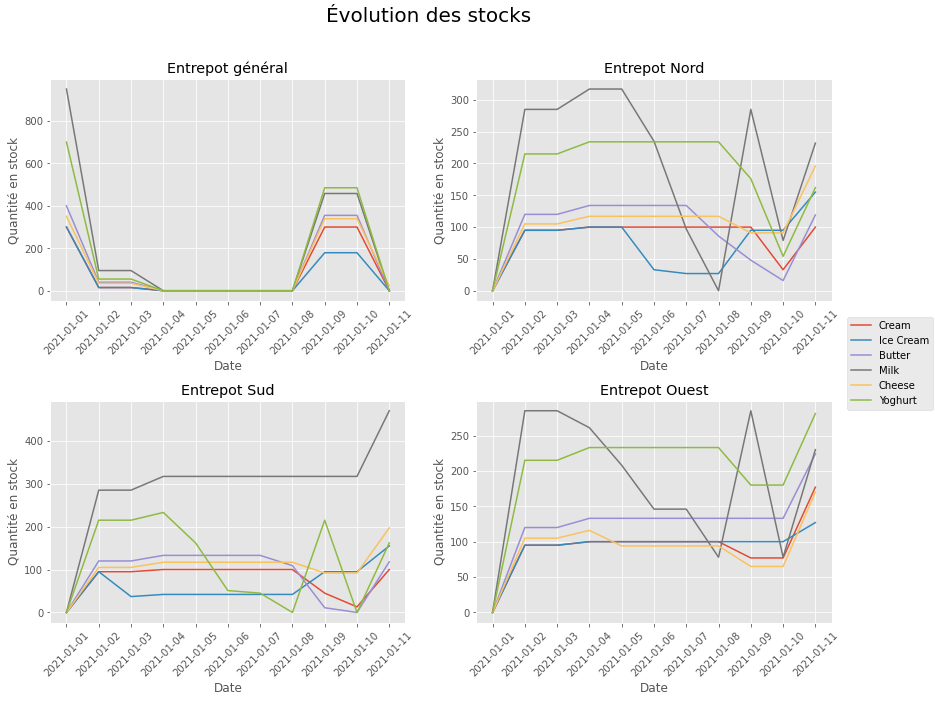

In [12]:
general, nord, sud, ouest = drawStocks(df_inventory, "C9", ["Cream", "Ice Cream", "Butter", "Milk", "Cheese", "Yoghurt"])

## **Stratégie** :
- Au début, on fixe les prix au même niveau (25% de plus que le prix initale)
- On répartie les produits de façon uniforme dans les 3 régions

### (1) Prix + gestion de la répartition des stocks
- Analyse de la répartition des ventes
- On répartie les produits en fonction de l'analyse
- On augmente le prix de 5%, si ventes (marge) >= au ventes précédentes (marge):
    - Retour au (1)
    - On reviens au prix précédent + 2.5%
    
### (2) Gestion des réaprovisionnements
On prend "X" la moyenne des ventes journalières des 3 derniers jours auxquelles on ajoute 10%.
Cela nous donne une estimations avec une sécurité des prochaines ventes de la journée.

Si "X" * 3 > stocks dispo :
- Faire un ordre d'achat de "X" * 5 jours

- stocks dispo < ventes par jours * 10% * 3 jours ET qu'aucune commande n'est passée:
    - réaprovisionnement de : ventes par jours * 10% * 5 jours
- si ventes par jours * 10% * le nombre de jours restant avant livraisons

#### Idées pour un réseau de neurones :
Targets : Meilleurs prix des produits, meilleur répartition des stocks, meilleur réaprovisionnement (tous les combiens de jours + quantités)
Inputs : Prix des produits, marge réalisée, quantités vendues...

Faire la courbe du stocks par jours par produit

In [17]:
# Récupération du fichier des stocks
df_inventory = pd.read_csv("data/05-10-2021/OData ISA set 5 Inventory 05-10-2021.csv", encoding="latin", delimiter=";")

In [18]:
# Suppression des colonnes inutiles
df_inventory.drop(["SIM_DATE", "MATERIAL_NUMBER", "MATERIAL_DESCRIPTION", "MATERIAL_TYPE", "MATERIAL_SIZE", "UNIT"], axis=1, inplace=True)

# Conversion des types
columns_type = {'ID': 'string', 'PLANT': 'string', 'STORAGE_LOCATION': 'string', 'MATERIAL_CODE': 'string', 'MATERIAL_LABEL': 'string'}
df_inventory = df_inventory.astype(columns_type)

# Conversion de la colonne SIM_CALENDAR_DATE au format datetime
df_inventory["SIM_CALENDAR_DATE"] = pd.to_datetime(df_inventory["SIM_CALENDAR_DATE"], format="%d/%m/%Y %H:%M")

In [19]:
df_inventory.dtypes

ID                                   string
ROW_NUMBER                            int64
PLANT                                string
SIM_ROUND                             int64
SIM_STEP                              int64
SIM_CALENDAR_DATE            datetime64[ns]
SIM_PERIOD                            int64
SIM_ELAPSED_STEPS                     int64
STORAGE_LOCATION                     string
MATERIAL_CODE                        string
MATERIAL_LABEL                       string
INVENTORY_OPENING_BALANCE             int64
dtype: object

In [20]:
# Tri du tableau par ROW_NUMBER
df_inventory.sort_values(by=["ROW_NUMBER"], axis=0, inplace=True, ignore_index=True)

In [21]:
df_inventory.head()

,ID,ROW_NUMBER,PLANT,SIM_ROUND,SIM_STEP,SIM_CALENDAR_DATE,SIM_PERIOD,SIM_ELAPSED_STEPS,STORAGE_LOCATION,MATERIAL_CODE,MATERIAL_LABEL,INVENTORY_OPENING_BALANCE
0,.1~1,1,A5,1,1,2021-01-01,1,1,03,T01,Milk,0
1,.1~2,2,A5,1,1,2021-01-01,1,1,03,T02,Cream,0
2,.1~3,3,A5,1,1,2021-01-01,1,1,03,T03,Yoghurt,0
3,.1~4,4,A5,1,1,2021-01-01,1,1,03,T04,Cheese,0
4,.1~5,5,A5,1,1,2021-01-01,1,1,03,T05,Butter,0


In [22]:
df_inventory_C5 = df_inventory[df_inventory["PLANT"] == "C5"]

In [23]:
df_inventory_C5_03 = df_inventory_C5[df_inventory_C5["STORAGE_LOCATION"] == "03"]

In [24]:
df_inventory_C5_03_milk = df_inventory_C5_03[df_inventory_C5_03["MATERIAL_LABEL"] == "Milk"]
df_inventory_C5_03_cream = df_inventory_C5_03[df_inventory_C5_03["MATERIAL_LABEL"] == "Cream"]
df_inventory_C5_03_yoghurt = df_inventory_C5_03[df_inventory_C5_03["MATERIAL_LABEL"] == "Yoghurt"]
df_inventory_C5_03_cheese = df_inventory_C5_03[df_inventory_C5_03["MATERIAL_LABEL"] == "Cheese"]
df_inventory_C5_03_butter = df_inventory_C5_03[df_inventory_C5_03["MATERIAL_LABEL"] == "Butter"]
df_inventory_C5_03_icecream = df_inventory_C5_03[df_inventory_C5_03["MATERIAL_LABEL"] == "Ice Cream"]

In [25]:
df_inventory_C5_03_milk.reset_index(drop=True, inplace=True)

In [26]:
df_inventory_C5_03_milk.head()

,ID,ROW_NUMBER,PLANT,SIM_ROUND,SIM_STEP,SIM_CALENDAR_DATE,SIM_PERIOD,SIM_ELAPSED_STEPS,STORAGE_LOCATION,MATERIAL_CODE,MATERIAL_LABEL,INVENTORY_OPENING_BALANCE
0,.1~3889,3889,C5,1,1,2021-01-01,1,1,03,T01,Milk,0
1,.1~3913,3913,C5,1,2,2021-01-02,1,2,03,T01,Milk,0
2,.1~3937,3937,C5,1,3,2021-01-03,1,3,03,T01,Milk,1200
3,.1~3961,3961,C5,1,4,2021-01-04,1,4,03,T01,Milk,1200
4,.1~3985,3985,C5,1,5,2021-01-05,1,5,03,T01,Milk,1200


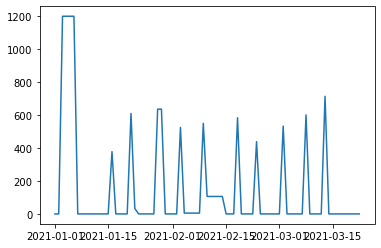

In [27]:
plt.plot(df_inventory_C5_03_milk["SIM_CALENDAR_DATE"], df_inventory_C5_03_milk["INVENTORY_OPENING_BALANCE"])

In [55]:
Company_Risk_Rate = 3
Market_Risk_Rate = 7
Profit = 1430.09
Elapsed_Steps = 2

In [56]:
Company_Valuation = ((Profit/Elapsed_Steps) * 8) / ((Company_Risk_Rate + Market_Risk_Rate) / 1000)

In [57]:
print(round(Company_Valuation, 1))

572036.0
